<b><font color= blue size =4>Lead Scoring - Case Study</font></b><br>
<b><font color = maroon>Problem Statement</font></b><br>
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

<b><font color = maroon>Goals of Case Study</font></b><br>

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


<b><font color= blue size =4>Step 1 : Importing Libraries and Data</font></b>

In [186]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

#importing library for splitting dataset
from sklearn.model_selection import train_test_split

#importing library for feature scaling
from sklearn.preprocessing import StandardScaler
# importing necessary library
import statsmodels.api as sm

#importing library for splitting dataset
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics

from sklearn.metrics import confusion_matrix

# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

In [187]:
#importing dataset to csv
leads_df=pd.read_csv("Leads.csv")

#Let's see the head of our dataset
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [188]:
#Let's check the dimesions of the dataframe
leads_df.shape

(9240, 37)

In [189]:
#Statstical aspects of the dataframe
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [190]:
#Let's check out info of each column
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [191]:
#check for duplicates
sum(leads_df.duplicated(subset = 'Prospect ID')) == 0

True

In [192]:
#check for duplicates
sum(leads_df.duplicated(subset = 'Lead Number')) == 0

True

## <font color=purple>Exploratory Data Analysis</font>

In [193]:
#dropping Lead Number and Prospect ID since they have all unique values

leads_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [194]:
#Replacing 'Select' values with Nan
leads_df=leads_df.replace("Select", np.nan)

In [195]:
#Checking for count of missing values in each column
leads_df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [196]:
null_percentage = leads_df.apply(lambda x: round(100*(x.isnull().sum()/len(x.index)), 2))
null_percentage

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [197]:
threshold = 0.45  # 45% threshold
null_percentage = leads_df.isnull().mean()  # Calculate the percentage of null values for each column
columns_to_drop = null_percentage[null_percentage > threshold].index  # Get columns that exceed the threshold

leads_df.drop(columns_to_drop, axis=1, inplace=True)

In [198]:
#checking percentage of null values in each column after dropping columns with more than 45% missing values

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

<b><font color= maroon size =3>3.3 Categorical Attributes Analysis: </font></b>
 

<b><font color= green size =3>Imbalanced Variables</font></b>

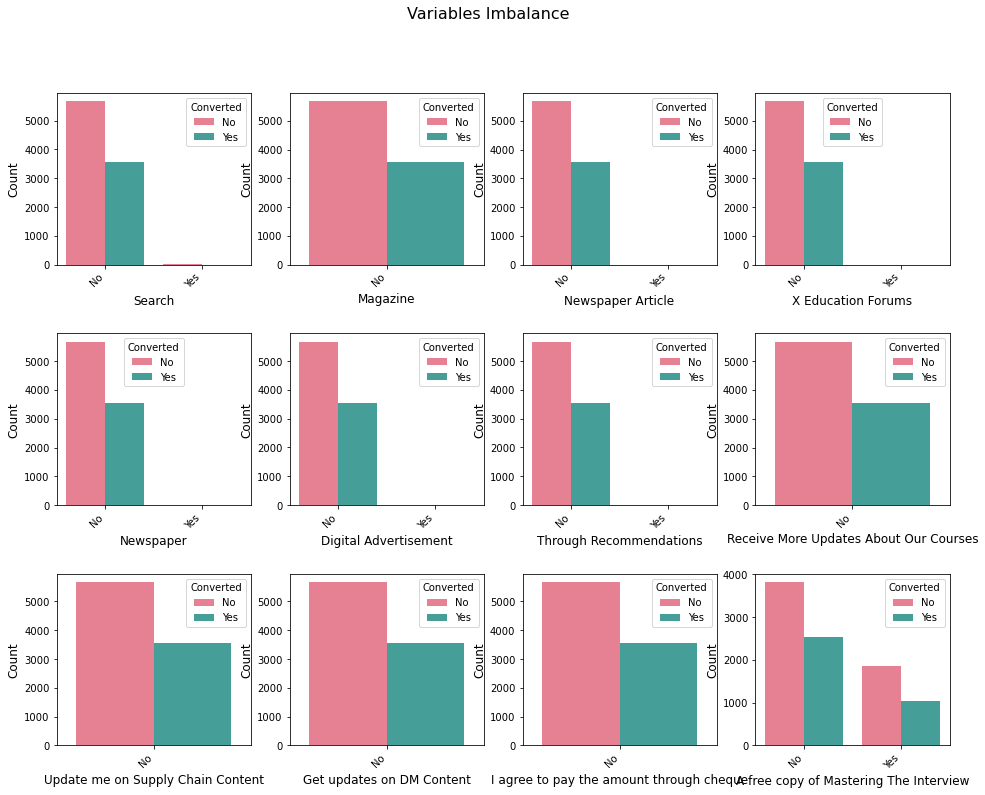

In [199]:
fig, axs = plt.subplots(3, 4, figsize=(16, 12))
fig.suptitle("Variables Imbalance", fontsize=16)

sns.countplot(x="Search", hue="Converted", data=leads_df, ax=axs[0, 0], palette='husl')
sns.countplot(x="Magazine", hue="Converted", data=leads_df, ax=axs[0, 1], palette='husl')
sns.countplot(x="Newspaper Article", hue="Converted", data=leads_df, ax=axs[0, 2], palette='husl')
sns.countplot(x="X Education Forums", hue="Converted", data=leads_df, ax=axs[0, 3], palette='husl')
sns.countplot(x="Newspaper", hue="Converted", data=leads_df, ax=axs[1, 0], palette='husl')
sns.countplot(x="Digital Advertisement", hue="Converted", data=leads_df, ax=axs[1, 1], palette='husl')
sns.countplot(x="Through Recommendations", hue="Converted", data=leads_df, ax=axs[1, 2], palette='husl')
sns.countplot(x="Receive More Updates About Our Courses", hue="Converted", data=leads_df, ax=axs[1, 3], palette='husl')
sns.countplot(x="Update me on Supply Chain Content", hue="Converted", data=leads_df, ax=axs[2, 0], palette='husl')
sns.countplot(x="Get updates on DM Content", hue="Converted", data=leads_df, ax=axs[2, 1], palette='husl')
sns.countplot(x="I agree to pay the amount through cheque", hue="Converted", data=leads_df, ax=axs[2, 2], palette='husl')
sns.countplot(x="A free copy of Mastering The Interview", hue="Converted", data=leads_df, ax=axs[2, 3], palette='husl')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Set labels and rotate x-axis labels
for ax in axs.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.legend(title="Converted", labels=["No", "Yes"])

plt.show()

<b><font size= 3> Inference </font></b><br><ul><li> For all these columns  except 'A free copy of Mastering The Interview' data is highly imbalanced, thus we will drop them</li><li> "A free copy of Mastering The Interview" is a redundant variable so we will include this also in list of dropping columns.</li>

In [200]:
cols_to_drop = ['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
                'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
                'Update me on Supply Chain Content', 'Get updates on DM Content',
                'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

<b><font color= green size =3> Lead Source</font></b>

In [201]:
#checking value counts of Lead Source column

leads_df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [202]:
# Replace NaN values with 'Google'
leads_df['Lead Source'].fillna('Google', inplace=True)

# Convert 'google' to 'Google'
leads_df['Lead Source'] = leads_df['Lead Source'].str.capitalize()

# Replacing specific values in the 'Lead Source' column with 'Other'
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['Facebook', 'Bing', 'Click2call', 'Live chat', 'Press_release', 'Social media',
                          'Testone', 'Welearn', 'Blog', 'Pay per click ads', 'Welearnblog_home',
                          'Youtubechannel', 'Nc_edm', 'Welingak website', 'Referral sites', 'Other'], 'Others')

In [203]:
# Printing the updated value counts of the 'Lead Source' column
print(leads_df['Lead Source'].value_counts())

Google            2909
Direct traffic    2543
Olark chat        1755
Organic search    1154
Reference          534
Others             345
Name: Lead Source, dtype: int64


<Figure size 1080x360 with 0 Axes>

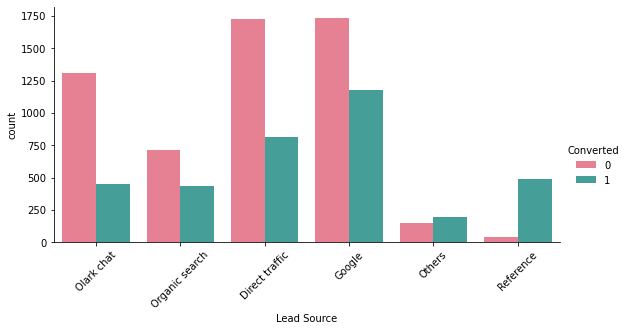

In [204]:
plt.figure(figsize=(15, 5))
sns.catplot(x='Lead Source', hue='Converted', data=leads_df, kind='count', palette='husl', height=4, aspect=2)
plt.xticks(rotation=45)
plt.show()

<b><font color= green size =3> Country</font></b>

In [205]:
#checking value counts of Country column
leads_df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

#### Since, missing values are very high , we can impute all missing values with  value 'not provided'


In [206]:
#Imputing missing values in Country column with "'not provided"
leads_df['Country'] = leads_df['Country'].replace(np.nan,'not provided')

In [207]:
leads_df['Country'].value_counts(dropna = False)

India                   6492
not provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

<Figure size 1800x720 with 0 Axes>

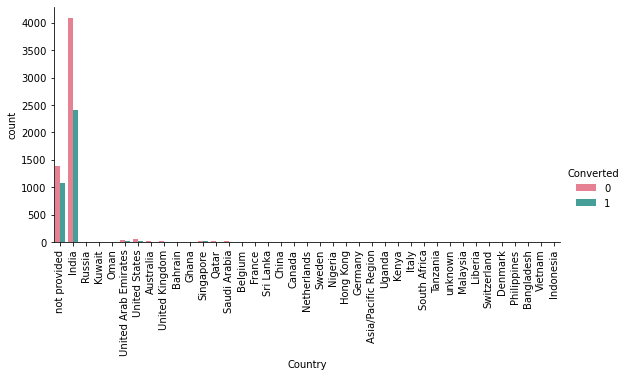

In [208]:
plt.figure(figsize=(25, 10))
sns.catplot(x='Country', hue='Converted', data=leads_df, kind='count', palette='husl', height=4, aspect=2)
plt.xticks(rotation=90)
plt.show()

<b><font size= 3> Inference </font></b><br>As we can see that most of the data consists of value 'India', no inference can be drawn from this parameter.Hence, we can drop this column

In [209]:
#creating a list of columns to be droppped

cols_to_drop.append('Country')

#checking out list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country']

In [210]:
#checking value counts of 'What is your current occupation' column
leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [211]:
#Creating new category 'Not provided'

leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'Not provided')

<Figure size 1080x360 with 0 Axes>

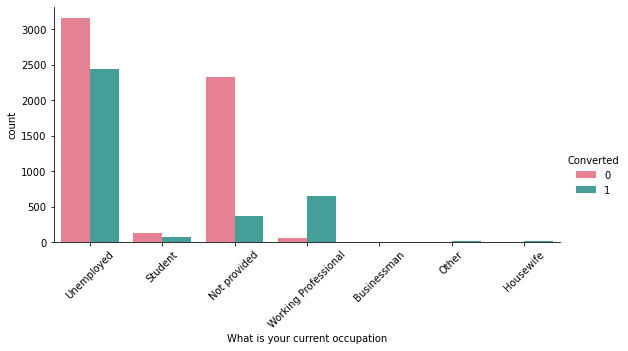

In [212]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15, 5))
sns.catplot(x='What is your current occupation', hue='Converted', data=leads_df, kind='count', palette='husl', height=4, aspect=2)
plt.xticks(rotation=45)
plt.show()

<b><font color= green size =3> What matters most to you in choosing a course</font></b>

In [213]:
#checking value counts of 'What matters most to you in choosing a course'

leads_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [214]:
leads_df['What matters most to you in choosing a course'] = leads_df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

<Figure size 1080x360 with 0 Axes>

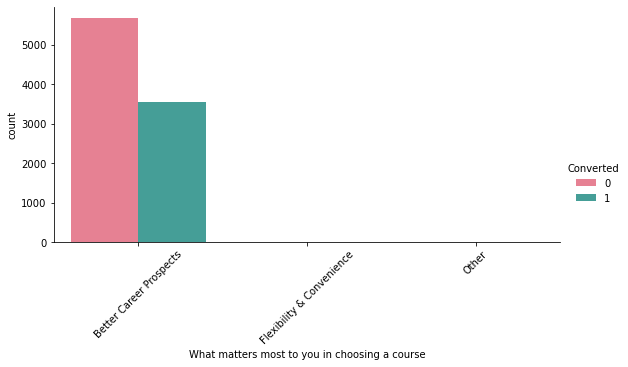

In [215]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15, 5))
sns.catplot(x='What matters most to you in choosing a course', hue='Converted', data=leads_df, kind='count', palette='husl', height=4, aspect=2)
plt.xticks(rotation=45)
plt.show()

In [216]:
# Append 'What matters most to you in choosing a course'to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')

#checking updated list for columns to be dropped
# cols_to_drop

<b><font color= green size =3>Last Activity</font></b>

In [217]:
#checking value counts of Last Activity
leads_df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [218]:
  #replacing Nan Values with mode value "Email Opened"

leads_df['Last Activity'] = leads_df['Last Activity'].replace(np.nan,'Email Opened')

In [219]:
#combining low frequency values
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation', 
                                                       'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [220]:
leads_df['Last Activity'].value_counts(dropna = False)

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

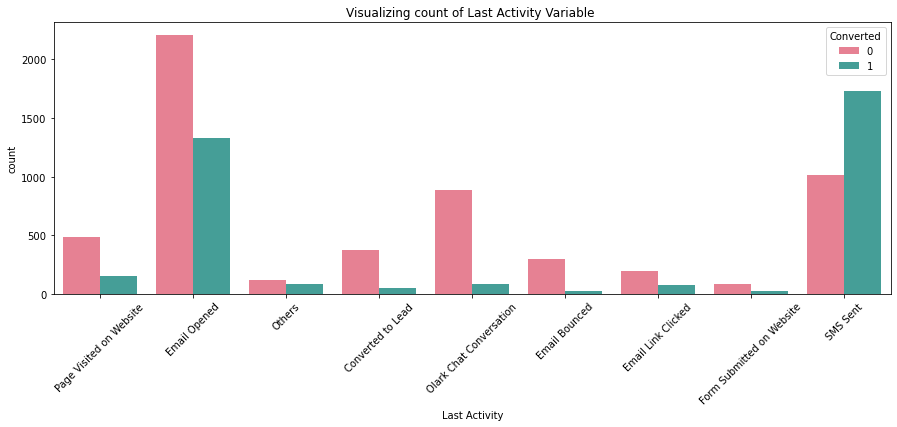

In [221]:
#visualizing count of Last Activity Variable 

plt.figure(figsize=(15,5))
s1=sns.countplot(x='Last Activity', hue='Converted' , data = leads_df , palette = 'husl')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
s1.set_title('Visualizing count of Last Activity Variable ')
plt.show()

In [222]:
# Append 'Last Activity' to the cols_to_drop List it is a X-education's sales team generated data
cols_to_drop.append('Last Activity')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity']

In [223]:
#Check the Null Values in All Columns after imputation:
null_percentage = leads_df.isnull().sum().divide(len(leads_df.index)).multiply(100).round(2)
null_percentage

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                           0.00
Specialization                                   36.58
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [224]:
# Remaining missing values percentage is less than 2%, we can drop those rows without affecting the data
leads_df = leads_df.dropna()

In [225]:
leads_df.shape

(3934, 28)

In [226]:
#Checking percentage of Null Values in All Columns:
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

<b><font color= green size =3>Lead Origin</font></b>

<Figure size 1080x360 with 0 Axes>

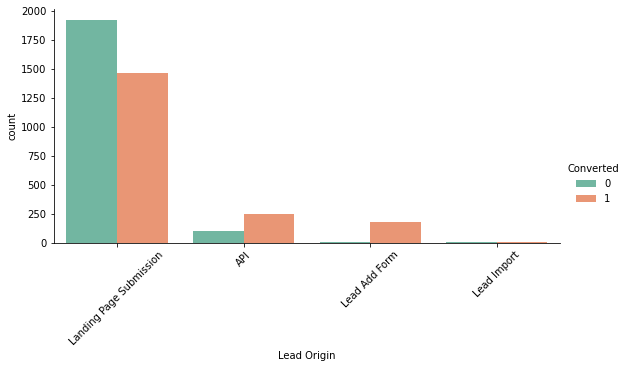

In [227]:
plt.figure(figsize=(15, 5))
sns.catplot(x='Lead Origin', hue='Converted', data=leads_df, kind='count', palette='Set2', height=4, aspect=2)
plt.xticks(rotation=45)
plt.show()

<b><font color= green size =3>Do Not Email & Do Not Call</font></b>

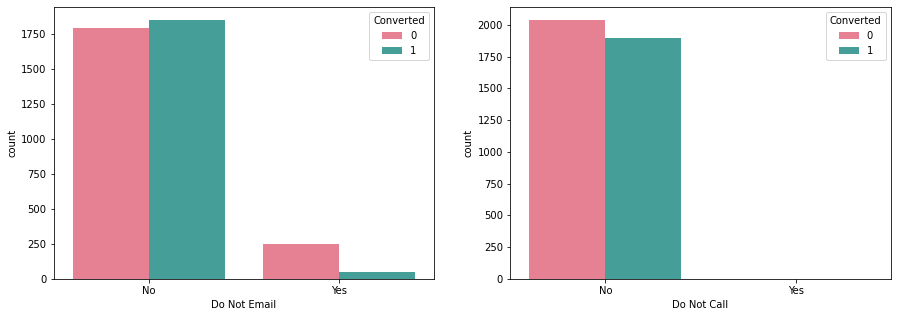

In [228]:
fig, axs = plt.subplots(1,2,figsize = (15,5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads_df, ax=plt.subplot(1, 2, 1),palette = 'husl')
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads_df, ax=plt.subplot(1, 2, 2),palette = 'husl')
plt.show()

In [229]:
# Append 'Do Not Call' to the cols_to_drop List
cols_to_drop.append('Do Not Call')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call']

<b><font color= green size =3>Last Notable Activity</font></b>

In [230]:
#checking value counts of last Notable Activity
leads_df['Last Notable Activity'].value_counts()

Email Opened                    1381
SMS Sent                        1114
Modified                        1112
Page Visited on Website          159
Email Link Clicked                71
Unsubscribed                      26
Email Bounced                     20
Olark Chat Conversation           19
Unreachable                       17
Had a Phone Conversation          11
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Email Marked Spam                  1
Name: Last Notable Activity, dtype: int64

In [231]:
#clubbing lower frequency values

leads_df['Last Notable Activity'] = leads_df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

In [232]:
leads_df['Last Notable Activity'].value_counts()

Email Opened               1381
SMS Sent                   1114
Modified                   1112
Page Visited on Website     159
Others                       78
Email Link Clicked           71
Olark Chat Conversation      19
Name: Last Notable Activity, dtype: int64

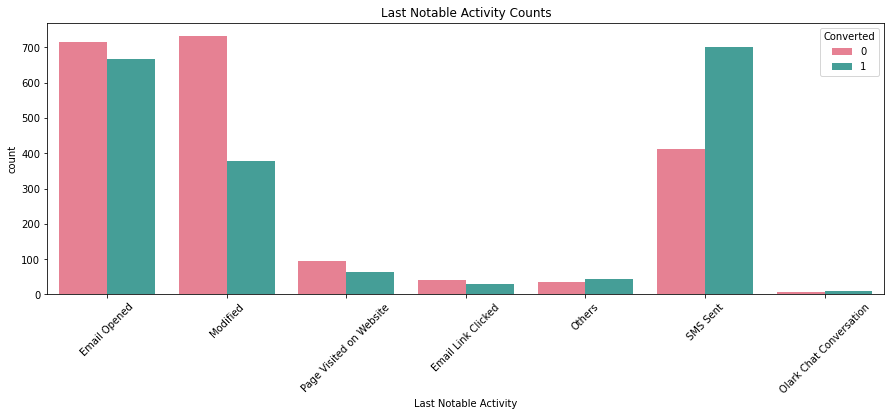

In [233]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (15,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_df , palette = 'husl')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax1.set_title('Last Notable Activity Counts')
plt.show()

In [234]:
# Append 'Last Notable Activity'to the cols_to_drop List as this is a sales team generated data
cols_to_drop.append('Last Notable Activity')

In [235]:
# checking final list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call',
 'Last Notable Activity']

In [236]:
#dropping columns
leads = leads_df.drop(cols_to_drop,axis = 1)

#checking info of dataset for remaining columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3934 entries, 2 to 9239
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      3934 non-null   object 
 1   Lead Source                      3934 non-null   object 
 2   Do Not Email                     3934 non-null   object 
 3   Converted                        3934 non-null   int64  
 4   TotalVisits                      3934 non-null   float64
 5   Total Time Spent on Website      3934 non-null   int64  
 6   Page Views Per Visit             3934 non-null   float64
 7   Specialization                   3934 non-null   object 
 8   What is your current occupation  3934 non-null   object 
 9   Tags                             3934 non-null   object 
 10  City                             3934 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 368.8+ KB


In [237]:
#checking dataset
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Tags,City
2,Landing Page Submission,Direct traffic,No,1,2.0,1532,2.00,Business Administration,Student,Will revert after reading the email,Mumbai
3,Landing Page Submission,Direct traffic,No,0,1.0,305,1.00,Media and Advertising,Unemployed,Ringing,Mumbai
6,Landing Page Submission,Google,No,1,2.0,1640,2.00,Supply Chain Management,Unemployed,Will revert after reading the email,Mumbai
10,Landing Page Submission,Organic search,No,1,8.0,1351,8.00,Travel and Tourism,Unemployed,Will revert after reading the email,Other Metro Cities
11,Landing Page Submission,Direct traffic,No,1,8.0,1343,2.67,Human Resource Management,Unemployed,Lost to EINS,Thane & Outskirts


### <font color =blue>3.4 Numerical Attributes Analysis:</font>

<b><font color= green size =3>Converted</font></b>

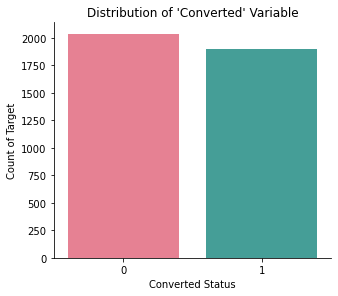

In [238]:
#Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
#Visualizing Distribution of 'Converted' Variable
sns.catplot(x='Converted', data=leads_df, kind='count', palette='husl', height=4, aspect=1.2)
plt.xlabel("Converted Status")
plt.ylabel("Count of Target")
plt.title("Distribution of 'Converted' Variable")
plt.show()


In [239]:
# Finding out conversion rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

48.195221148957806

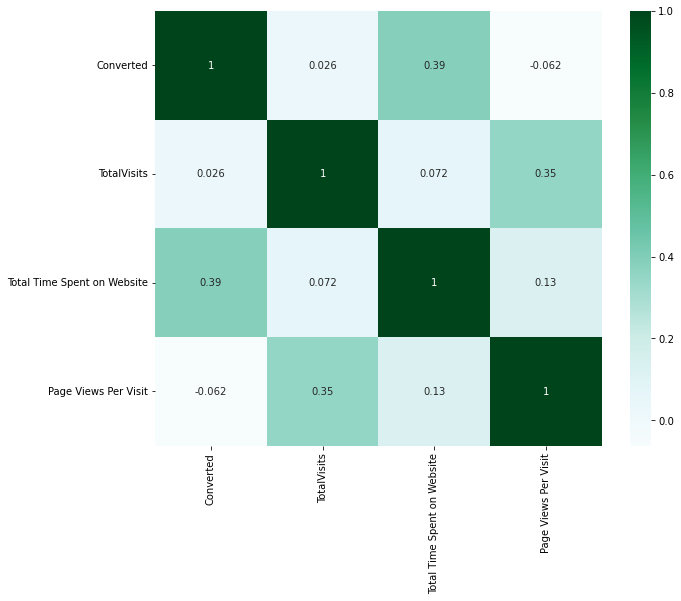

In [240]:
#Checking correlations of numeric values using heatmap
# Calculate the correlation matrix
corr_matrix = leads_df.corr()

# Size of the figure
plt.figure(figsize=(10, 8))

# Heatmap
sns.heatmap(corr_matrix, cmap="BuGn", annot=True)
plt.show()


<b><font color= green size =3>Total Visits</font></b>

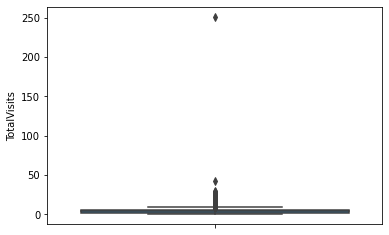

In [241]:
#visualizing spread of variable Total Visits
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [242]:
#checking percentile values for "Total Visits"
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    3934.000000
mean        4.462888
std         5.285495
min         0.000000
5%          0.000000
25%         2.000000
50%         4.000000
75%         5.000000
90%         8.000000
95%        11.000000
99%        19.000000
max       251.000000
Name: TotalVisits, dtype: float64

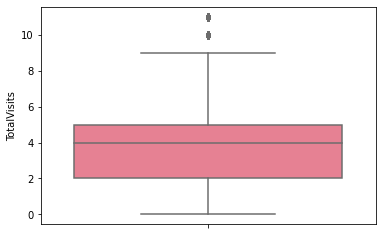

In [243]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['TotalVisits'], palette = 'husl')
plt.show()

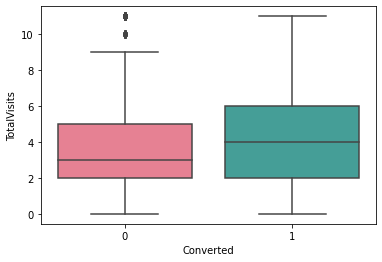

In [244]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads, palette = 'husl')
plt.show()

<b><font size= 3> Inference </font></b><br> As the median for both converted and non-converted leads are same , nothing coclusive can be said on the basis of variable TotalVisits

<b><font color= green size =3>Total time spent on website</font></b>

In [245]:
#checking percentiles for "Total Time Spent on Website"

leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    3934.000000
mean      649.248856
std       561.852042
min         0.000000
5%          0.000000
25%       156.000000
50%       422.000000
75%      1130.750000
90%      1486.000000
95%      1638.000000
99%      1878.680000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

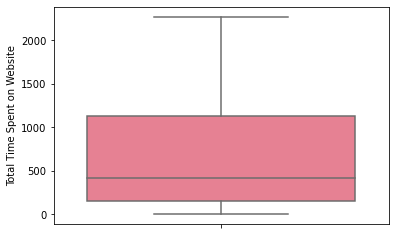

In [246]:
#visualizing spread of variable 'Total Time Spent on Website'
sns.boxplot(y = leads['Total Time Spent on Website'], palette = 'husl')
plt.show()

#### Since there are no major outliers for the above variable, outlier treatment is not required for it

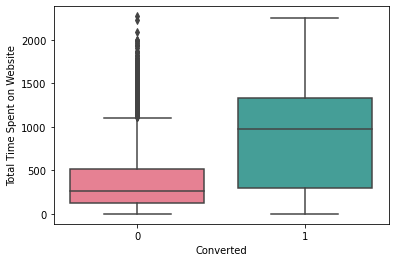

In [247]:
# Visualizing 'Total Time Spent on Website' w.r.t Target Variable 'converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads, palette = 'husl')
plt.show()

<b><font color= green size =3>Page views per visit</font></b>

In [248]:
leads['Page Views Per Visit'].describe()

count    3934.000000
mean        3.089639
std         1.937321
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

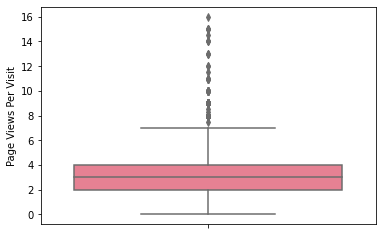

In [249]:
#visualizing spread of variable 'Page Views Per Visit'
sns.boxplot(y =leads['Page Views Per Visit'], palette = 'husl')
plt.show()

#### Presence of outliers can be clearly seen in the above boxplot, thus outlier treatment need to be done for this variable

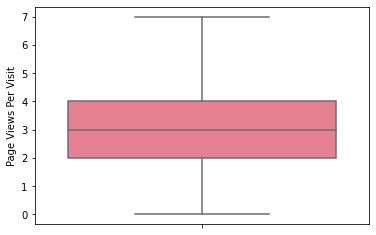

In [250]:
#Outlier Treatment: capping the outliers to 95% value for analysis
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['Page Views Per Visit'], palette = 'husl')
plt.show()

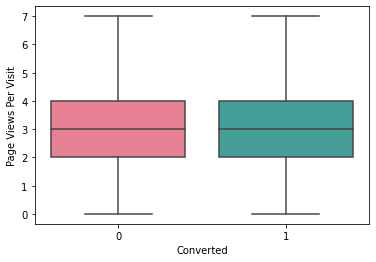

In [251]:
#visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads, palette = 'husl')
plt.show()

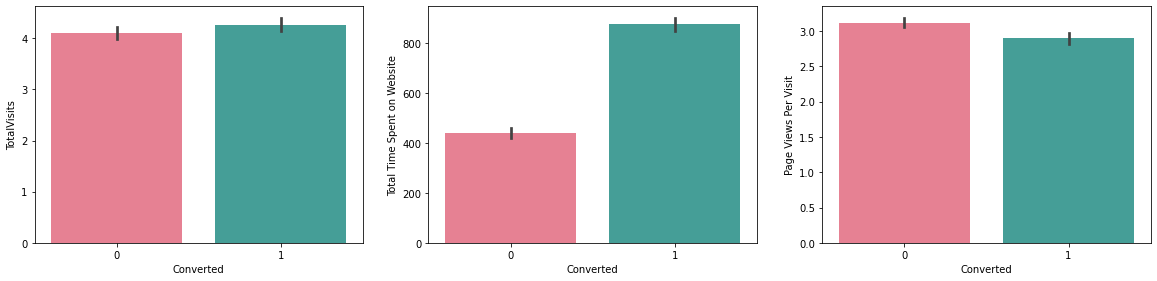

In [252]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='husl', data = leads)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='husl', data = leads)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='husl', data = leads)
plt.show()

# <b><font color= blue size =4>Step 4: Data Preparation</font></b>

<b><font color= maroon size =3>4.1 Converting some binary variables (Yes/No) to 0/1</font></b>

In [253]:
varlist = ['Do Not Email']

# Define the mapping dictionary
mapping_dict = {'Yes': 1, 'No': 0}

# Map the values using the replace method
leads[varlist] = leads[varlist].replace(mapping_dict)

# Print the updated DataFrame
leads.tail()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Tags,City
9234,Landing Page Submission,Direct traffic,0,1,5.0,210,2.50,Business Administration,Unemployed,Will revert after reading the email,Mumbai
9235,Landing Page Submission,Direct traffic,1,1,8.0,1845,2.67,IT Projects Management,Unemployed,Will revert after reading the email,Mumbai
9236,Landing Page Submission,Direct traffic,0,0,2.0,238,2.00,Media and Advertising,Unemployed,wrong number given,Mumbai
9237,Landing Page Submission,Direct traffic,1,0,2.0,199,2.00,Business Administration,Unemployed,invalid number,Mumbai
9239,Landing Page Submission,Direct traffic,0,1,6.0,1279,3.00,Supply Chain Management,Unemployed,Will revert after reading the email,Other Cities


In [254]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3934 entries, 2 to 9239
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      3934 non-null   object 
 1   Lead Source                      3934 non-null   object 
 2   Do Not Email                     3934 non-null   int64  
 3   Converted                        3934 non-null   int64  
 4   TotalVisits                      3934 non-null   float64
 5   Total Time Spent on Website      3934 non-null   int64  
 6   Page Views Per Visit             3934 non-null   float64
 7   Specialization                   3934 non-null   object 
 8   What is your current occupation  3934 non-null   object 
 9   Tags                             3934 non-null   object 
 10  City                             3934 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 368.8+ KB


<b><font color= maroon size =3>4.2 Dummy Variable Creation:</font></b>

In [255]:
#getting a list of categorical columns foy creating dummy

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Specialization',
       'What is your current occupation', 'Tags', 'City'],
      dtype='object')

In [256]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin']], drop_first=True)
leads = pd.concat([leads,dummy],1)



dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)


dummy = pd.get_dummies(leads['What is your current occupation'], prefix  = 'What is your current occupation')
dummy = dummy.drop(['What is your current occupation_Not provided'], 1)
leads = pd.concat([leads, dummy], axis = 1)



In [257]:
#dropping the original columns after dummy variable creation

leads.drop(cat_cols,1,inplace = True)

In [258]:
#checking dataset after dummy variable creation
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct traffic,Lead Source_Google,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Reference,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
2,0,1,2.0,1532,2.00,1,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.00,1,0,0,1,0,0,0,0,0,0,0,0,1,0
6,0,1,2.0,1640,2.00,1,0,0,0,1,0,0,0,0,0,0,0,1,0
10,0,1,8.0,1351,7.00,1,0,0,0,0,0,1,0,0,0,0,0,1,0
11,0,1,8.0,1343,2.67,1,0,0,1,0,0,0,0,0,0,0,0,1,0


# <b><font color= blue size =4>Step 5: Test-Train Split</font></b>

In [259]:
# Putting feature variable to X
X=leads.drop('Converted', axis=1)

#checking head of X
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct traffic,Lead Source_Google,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Reference,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
2,0,2.0,1532,2.00,1,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.00,1,0,0,1,0,0,0,0,0,0,0,0,1,0
6,0,2.0,1640,2.00,1,0,0,0,1,0,0,0,0,0,0,0,1,0
10,0,8.0,1351,7.00,1,0,0,0,0,0,1,0,0,0,0,0,1,0
11,0,8.0,1343,2.67,1,0,0,1,0,0,0,0,0,0,0,0,1,0


In [260]:
# Putting response variable to y
y = leads['Converted']

#checking head of y
y.head()

2     1
3     0
6     1
10    1
11    1
Name: Converted, dtype: int64

In [261]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# <b><font color= blue size =4>Step 6: Feature Scaling</font></b>

In [262]:
#scaling of features
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#checking X-train dataset after scaling
X_train.head()


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct traffic,Lead Source_Google,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Reference,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
5066,-0.285883,1.034764,-0.750235,2.329016,1,0,0,1,0,0,0,0,0,0,0,0,1,0
6687,-0.285883,-0.440103,2.188739,-0.018293,1,0,0,1,0,0,0,0,0,0,0,0,1,0
5612,-0.285883,1.772197,-0.904080,2.329016,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4020,-0.285883,-0.440103,-0.336444,-0.898534,1,0,0,1,0,0,0,0,0,0,0,0,1,0
483,3.497939,-0.808819,-0.822737,-0.605121,1,0,0,1,0,0,0,0,0,0,0,0,1,0


In [263]:
## Checking the conversion rate from 'converted' column as it denotes the target variable

conversion_rate = leads['Converted'].mean() * 100

# Print the conversion rate
conversion_rate


48.195221148957806

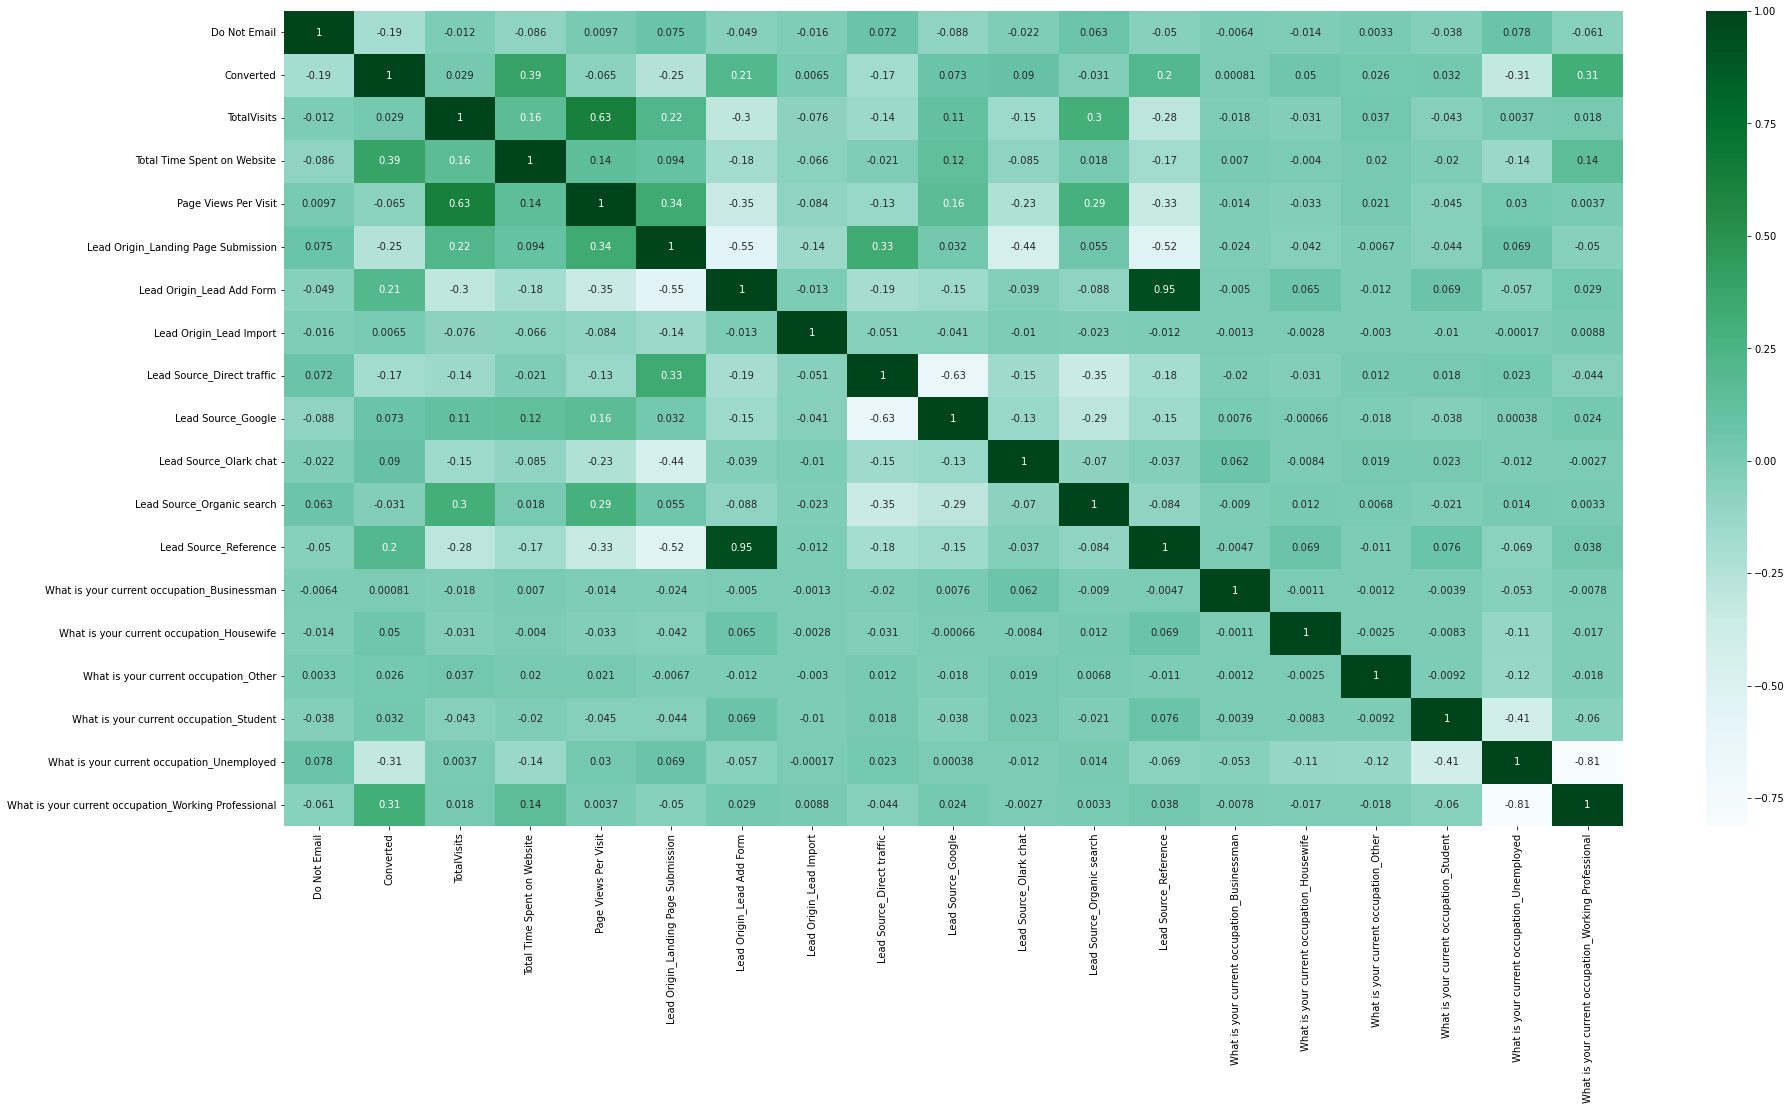

In [264]:
# Let's see the correlation matrix
plt.figure(figsize = (30,15))        # Size of the figure
sns.heatmap(leads.corr(),annot = True, cmap='BuGn')
plt.show()


<b><font color= maroon size =3>Dropping highly correlated dummy variables</font><b>

In [265]:
X_test = X_test.drop(["Lead Source_Olark chat"],1)
X_test = X_test.drop(["Lead Origin_Landing Page Submission"],1)

In [266]:
X_train = X_train.drop(["Lead Source_Olark chat", "Lead Origin_Landing Page Submission"], axis=1)

# <b><font color= blue size =4>Step 7: Model Building using Stats Model & RFE</font></b>

In [267]:
logreg = LogisticRegression()


rfe = RFE(estimator=logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [268]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True])

In [269]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Organic search', True, 1),
 ('Lead Source_Reference', True, 1),
 ('What is your current occupation_Businessman', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 2),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1)]

In [270]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct traffic',
       'Lead Source_Google', 'Lead Source_Organic search',
       'Lead Source_Reference', 'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [271]:
X_train.columns[~rfe.support_]

Index(['What is your current occupation_Other'], dtype='object')

<b><font color= green size =3>Model 1</font></b>

In [272]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2753
Model:                            GLM   Df Residuals:                     2737
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1341.8
Date:                Sun, 04 Jun 2023   Deviance:                       2683.6
Time:                        12:51:07   Pearson chi2:                 3.29e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3363
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    3.1287      0.542      5.773      0.000       2.067       4.191
Do Not Email                                            -0.3338      0.060     -5.547      0.000      -0.452      -0.216
TotalVisits                                              0.2938      0.062      4.765      0.000       0.173       0.415
Total Time Spent on Website                              0.9966      0.052     19.156      0.000       0.895       1.099
Page Views Per Visit                                    -0.1263      0.064     -1.973      0.048      -0.252      -0.001
Lead Origin_Lead Add Form                                3.3095      1.138      2.908      0.004       1.079       5.540
Lead Origin_Lead Import                                  0.3850      0.792      0.486      0.627      -1.166       1.936
Lead Source_Direct traffic                              -1.9662      0.258     -7.629      0.000      -2.471      -1.461
Lead Source_Google                                      -1.4862      0.264     -5.639      0.000      -2.003      -0.970
Lead Source_Organic search                              -1.8168      0.293     -6.200      0.000      -2.391      -1.242
Lead Source_Reference                                   -0.8392      1.209     -0.694      0.488      -3.209       1.530
What is your current occupation_Businessman            -24.4181   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
What is your current occupation_Housewife               20.6565   1.57e+04      0.001      0.999   -3.07e+04    3.08e+04
What is your current occupation_Student                 -1.2001      0.549     -2.186      0.029      -2.276      -0.124
What is your current occupation_Unemployed              -1.9787      0.482     -4.102      0.000      -2.924      -1.033
What is your current occupation_Working Professional     1.2028      0.553      2.176      0.030       0.119       2.286
========================================================================================================================
"""

In [273]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Housewife',1)

<b><font color= green size =3>Model 2</font></b>

In [274]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2753
Model:                            GLM   Df Residuals:                     2738
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1342.9
Date:                Sun, 04 Jun 2023   Deviance:                       2685.7
Time:                        12:51:07   Pearson chi2:                 3.30e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3358
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    3.3293      0.536      6.207      0.000       2.278       4.381
Do Not Email                                            -0.3343      0.060     -5.557      0.000      -0.452      -0.216
TotalVisits                                              0.2920      0.062      4.733      0.000       0.171       0.413
Total Time Spent on Website                              0.9957      0.052     19.145      0.000       0.894       1.098
Page Views Per Visit                                    -0.1275      0.064     -1.991      0.047      -0.253      -0.002
Lead Origin_Lead Add Form                                3.3049      1.138      2.904      0.004       1.075       5.535
Lead Origin_Lead Import                                  0.3839      0.791      0.485      0.628      -1.167       1.935
Lead Source_Direct traffic                              -1.9648      0.258     -7.627      0.000      -2.470      -1.460
Lead Source_Google                                      -1.4816      0.263     -5.625      0.000      -1.998      -0.965
Lead Source_Organic search                              -1.8052      0.293     -6.169      0.000      -2.379      -1.232
Lead Source_Reference                                   -0.8339      1.209     -0.690      0.490      -3.203       1.535
What is your current occupation_Businessman            -22.6248   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
What is your current occupation_Student                 -1.4044      0.542     -2.589      0.010      -2.468      -0.341
What is your current occupation_Unemployed              -2.1831      0.475     -4.598      0.000      -3.114      -1.253
What is your current occupation_Working Professional     0.9980      0.546      1.828      0.068      -0.072       2.068
========================================================================================================================
"""

<b><font color= green size =3>Model 3</font></b>

In [275]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2753
Model:                            GLM   Df Residuals:                     2738
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1342.9
Date:                Sun, 04 Jun 2023   Deviance:                       2685.7
Time:                        12:51:08   Pearson chi2:                 3.30e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3358
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    3.3293      0.536      6.207      0.000       2.278       4.381
Do Not Email                                            -0.3343      0.060     -5.557      0.000      -0.452      -0.216
TotalVisits                                              0.2920      0.062      4.733      0.000       0.171       0.413
Total Time Spent on Website                              0.9957      0.052     19.145      0.000       0.894       1.098
Page Views Per Visit                                    -0.1275      0.064     -1.991      0.047      -0.253      -0.002
Lead Origin_Lead Add Form                                3.3049      1.138      2.904      0.004       1.075       5.535
Lead Origin_Lead Import                                  0.3839      0.791      0.485      0.628      -1.167       1.935
Lead Source_Direct traffic                              -1.9648      0.258     -7.627      0.000      -2.470      -1.460
Lead Source_Google                                      -1.4816      0.263     -5.625      0.000      -1.998      -0.965
Lead Source_Organic search                              -1.8052      0.293     -6.169      0.000      -2.379      -1.232
Lead Source_Reference                                   -0.8339      1.209     -0.690      0.490      -3.203       1.535
What is your current occupation_Businessman            -22.6248   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
What is your current occupation_Student                 -1.4044      0.542     -2.589      0.010      -2.468      -0.341
What is your current occupation_Unemployed              -2.1831      0.475     -4.598      0.000      -3.114      -1.253
What is your current occupation_Working Professional     0.9980      0.546      1.828      0.068      -0.072       2.068
========================================================================================================================
"""

In [276]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Businessman',1)

<b><font color= green size =3>Model 4</font></b>

In [277]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2753
Model:                            GLM   Df Residuals:                     2739
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1344.9
Date:                Sun, 04 Jun 2023   Deviance:                       2689.9
Time:                        12:51:08   Pearson chi2:                 3.29e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3348
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    3.1004      0.507      6.117      0.000       2.107       4.094
Do Not Email                                            -0.3337      0.060     -5.550      0.000      -0.452      -0.216
TotalVisits                                              0.2937      0.062      4.767      0.000       0.173       0.414
Total Time Spent on Website                              0.9965      0.052     19.170      0.000       0.895       1.098
Page Views Per Visit                                    -0.1274      0.064     -1.990      0.047      -0.253      -0.002
Lead Origin_Lead Add Form                                3.3242      1.135      2.929      0.003       1.100       5.549
Lead Origin_Lead Import                                  0.4324      0.791      0.547      0.585      -1.118       1.983
Lead Source_Direct traffic                              -1.9165      0.256     -7.483      0.000      -2.419      -1.415
Lead Source_Google                                      -1.4353      0.262     -5.479      0.000      -1.949      -0.922
Lead Source_Organic search                              -1.7594      0.291     -6.040      0.000      -2.330      -1.189
Lead Source_Reference                                   -0.8034      1.206     -0.666      0.505      -3.166       1.560
What is your current occupation_Student                 -1.2209      0.517     -2.363      0.018      -2.233      -0.208
What is your current occupation_Unemployed              -1.9995      0.445     -4.493      0.000      -2.872      -1.127
What is your current occupation_Working Professional     1.1813      0.520      2.270      0.023       0.161       2.201
========================================================================================================================
"""

<b><font color= green size =3>Model 5</font></b>

In [278]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2753
Model:                            GLM   Df Residuals:                     2739
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1344.9
Date:                Sun, 04 Jun 2023   Deviance:                       2689.9
Time:                        12:51:08   Pearson chi2:                 3.29e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3348
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    3.1004      0.507      6.117      0.000       2.107       4.094
Do Not Email                                            -0.3337      0.060     -5.550      0.000      -0.452      -0.216
TotalVisits                                              0.2937      0.062      4.767      0.000       0.173       0.414
Total Time Spent on Website                              0.9965      0.052     19.170      0.000       0.895       1.098
Page Views Per Visit                                    -0.1274      0.064     -1.990      0.047      -0.253      -0.002
Lead Origin_Lead Add Form                                3.3242      1.135      2.929      0.003       1.100       5.549
Lead Origin_Lead Import                                  0.4324      0.791      0.547      0.585      -1.118       1.983
Lead Source_Direct traffic                              -1.9165      0.256     -7.483      0.000      -2.419      -1.415
Lead Source_Google                                      -1.4353      0.262     -5.479      0.000      -1.949      -0.922
Lead Source_Organic search                              -1.7594      0.291     -6.040      0.000      -2.330      -1.189
Lead Source_Reference                                   -0.8034      1.206     -0.666      0.505      -3.166       1.560
What is your current occupation_Student                 -1.2209      0.517     -2.363      0.018      -2.233      -0.208
What is your current occupation_Unemployed              -1.9995      0.445     -4.493      0.000      -2.872      -1.127
What is your current occupation_Working Professional     1.1813      0.520      2.270      0.023       0.161       2.201
========================================================================================================================
"""

<b><font color= green size =3>Calculating VIF</font></b>

In [279]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,16.19
4,Lead Origin_Lead Add Form,10.65
9,Lead Source_Reference,10.07
6,Lead Source_Direct traffic,8.70
7,Lead Source_Google,7.48
8,Lead Source_Organic search,3.78
12,What is your current occupation_Working Profes...,2.84
3,Page Views Per Visit,1.83
1,TotalVisits,1.74
10,What is your current occupation_Student,1.52


## <font color =maroon>Predicting a Train model</font>

In [280]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5066    0.188390
6687    0.791483
5612    0.224418
4020    0.255345
483     0.049110
7489    0.898043
2011    0.993221
7635    0.062302
5600    0.146943
2009    0.819053
dtype: float64

In [281]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18839018, 0.79148296, 0.22441752, 0.2553455 , 0.04910964,
       0.89804304, 0.99322113, 0.06230161, 0.14694321, 0.81905267])

In [282]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.188390,5066
1,1,0.791483,6687
2,0,0.224418,5612
3,0,0.255345,4020
4,0,0.049110,483


In [283]:
# Assign values based on condition using np.where
y_train_pred_final['Predicted'] = np.where(y_train_pred_final['Converted_prob'] > 0.5, 1, 0)

# Print the head of the DataFrame
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.188390,5066,0
1,1,0.791483,6687,1
2,0,0.224418,5612,0
3,0,0.255345,4020,0
4,0,0.049110,483,0


<b><font color =green size =3>Metrics -Accuracy, Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value</font>

In [284]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1164  266]
 [ 362  961]]


In [285]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7718852161278605


In [286]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [287]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7263794406651549

In [288]:
# Let us calculate specificity
TN / float(TN+FP)

0.813986013986014

In [289]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.18601398601398603


In [290]:
# positive predictive value 
print (TP / float(TP+FP))

0.7832110839445803


In [291]:
# Negative predictive value
print (TN / float(TN+ FN))

0.762778505897772


### <font color = maroon>PLOTTING ROC CURVE

In [292]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(15, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [293]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )


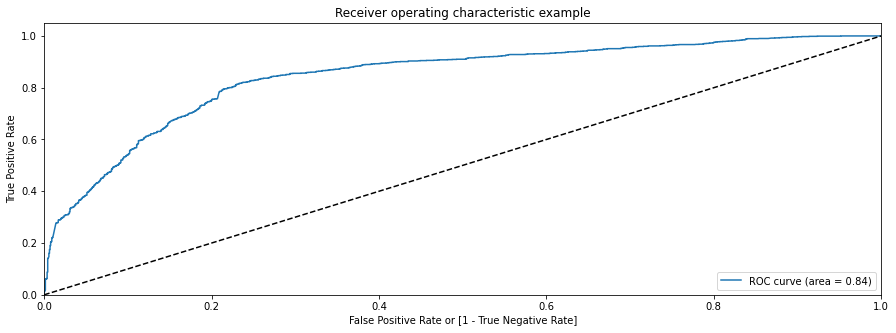

In [294]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### <font color = maroon>Finding Optimal Cutoff Point

In [295]:

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = np.where(y_train_pred_final['Converted_prob'] > i, 1, 0)

# Print the head of the DataFrame
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.188390,5066,0,1,1,0,0,0,0,0,0,0,0
1,1,0.791483,6687,1,1,1,1,1,1,1,1,1,0,0
2,0,0.224418,5612,0,1,1,1,0,0,0,0,0,0,0
3,0,0.255345,4020,0,1,1,1,0,0,0,0,0,0,0
4,0,0.049110,483,0,1,0,0,0,0,0,0,0,0,0


In [296]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.480567  1.000000  0.000000
0.1   0.1  0.523429  0.998488  0.083916
0.2   0.2  0.648020  0.935752  0.381818
0.3   0.3  0.758082  0.870748  0.653846
0.4   0.4  0.790410  0.820106  0.762937
0.5   0.5  0.771885  0.726379  0.813986
0.6   0.6  0.751907  0.631141  0.863636
0.7   0.7  0.714493  0.500378  0.912587
0.8   0.8  0.677443  0.380952  0.951748
0.9   0.9  0.646204  0.281935  0.983217


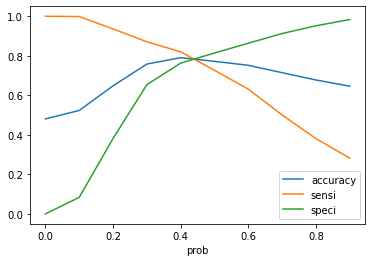

In [297]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [298]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.188390,5066,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.791483,6687,1,1,1,1,1,1,1,1,1,0,0,1
2,0,0.224418,5612,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.255345,4020,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.049110,483,0,1,0,0,0,0,0,0,0,0,0,0


In [299]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.188390,5066,0,19
1,1,0.791483,6687,1,79
2,0,0.224418,5612,0,22
3,0,0.255345,4020,0,26
4,0,0.049110,483,0,5


In [300]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    1152
0     171
Name: final_Predicted, dtype: int64

In [301]:
# check the precentage of final_predicted conversions

2005/float(2005+414)

0.8288548987184787

### <font color = maroon>Hence, we can see that the final prediction of conversions have a target of 83% conversion as per the X Educations CEO's requirement . Hence, we can say that this is a good model.

<b><font color = green size =3>Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set

In [302]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7580820922629858

In [303]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[ 935,  495],
       [ 171, 1152]], dtype=int64)

In [304]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [305]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8707482993197279

In [306]:
# Let us calculate specificity
TN / float(TN+FP)

0.6538461538461539

<b><font size=3>Inference:</font></b><br>
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.86, which is very good. We have the following values for the Train Data:
<ul>
    <li>Accuracy : 77.05%</li>
    <li>Sensitivity :82.89%</li>
    <li>Specificity : 73.49%</li></ul>
    
Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [307]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.34615384615384615


In [308]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6994535519125683


In [309]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8453887884267631


<b><font color= green size =3>Precision and Recall</font></b>

In [310]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[ 935,  495],
       [ 171, 1152]], dtype=int64)

In [311]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6994535519125683

In [312]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8707482993197279

In [313]:
from sklearn.metrics import precision_score, recall_score

In [314]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6994535519125683

In [315]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8707482993197279

<b><font color= green size =3>Precision and Recall Trade-off</font></b>

In [316]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

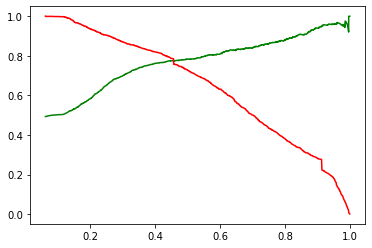

In [317]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## <font color =maroon>Predictions on  the test set

In [318]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct traffic,Lead Source_Google,Lead Source_Organic search,Lead Source_Reference,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
8679,-0.280248,0.675820,-0.480206,1.827954,0,0,1,0,0,0,0,0,0,0,1,0
3446,-0.280248,-0.792705,0.539689,-0.587157,0,0,0,1,0,0,0,0,0,0,1,0
1390,-0.280248,-0.792705,0.413106,-0.587157,0,0,0,1,0,0,0,0,0,0,1,0
7085,-0.280248,-0.792705,0.199724,-0.587157,0,0,1,0,0,0,0,0,0,0,1,0
5705,-0.280248,-0.425574,-0.979303,0.016621,0,0,1,0,0,0,0,0,0,0,0,1


In [319]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct traffic,Lead Source_Google,Lead Source_Organic search,Lead Source_Reference,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
8679,-0.280248,0.675820,-0.480206,1.827954,0,0,1,0,0,0,0,1,0
3446,-0.280248,-0.792705,0.539689,-0.587157,0,0,0,1,0,0,0,1,0
1390,-0.280248,-0.792705,0.413106,-0.587157,0,0,0,1,0,0,0,1,0
7085,-0.280248,-0.792705,0.199724,-0.587157,0,0,1,0,0,0,0,1,0
5705,-0.280248,-0.425574,-0.979303,0.016621,0,0,1,0,0,0,0,0,1


In [320]:
X_test_sm = sm.add_constant(X_test)

In [321]:
X_test_sm.shape

(1181, 14)

In [322]:
y_test_pred = res.predict(X_test_sm)    

In [323]:
y_test_pred[:10]

8679    0.225322
3446    0.534657
1390    0.503178
7085    0.336011
5705    0.795067
1829    0.586686
1731    0.312473
1830    0.602489
6710    0.137829
3614    0.331897
dtype: float64

In [324]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [325]:
# Let's see the head
y_pred_1.head()

,0
8679,0.225322
3446,0.534657
1390,0.503178
7085,0.336011
5705,0.795067


In [326]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [327]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [328]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [329]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [330]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,8679,0.225322
1,1,3446,0.534657
2,1,1390,0.503178
3,1,7085,0.336011
4,1,5705,0.795067


In [331]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})


In [332]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,8679,0.225322
1,1,3446,0.534657
2,1,1390,0.503178
3,1,7085,0.336011
4,1,5705,0.795067


#### <font color = green>Assigning Lead Score

In [333]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [334]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,8679,0,0.225322,23
1,3446,1,0.534657,53
2,1390,1,0.503178,50
3,7085,1,0.336011,34
4,5705,1,0.795067,80


In [335]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [336]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,8679,0,0.225322,23,0
1,3446,1,0.534657,53,1
2,1390,1,0.503178,50,1
3,7085,1,0.336011,34,1
4,5705,1,0.795067,80,1


In [337]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    512
0     61
Name: final_Predicted, dtype: int64

In [338]:
# check the precentage of final_predicted conversions on test data

865/float(865+177)

0.8301343570057581

### <font color = maroon>Hence we can see that the final prediction of conversions have a target rate of 83%  (same as predictions made on training data set)

<b><font color = green size =3>Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on test set

In [339]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7798475867908552

In [340]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[409, 199],
       [ 61, 512]], dtype=int64)

In [341]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [342]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.893542757417103

In [343]:
# Let us calculate specificity
TN / float(TN+FP)

0.6726973684210527

<b><font color = green size =3>Precision and Recall metrics for the test set

In [344]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.720112517580872

In [345]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.893542757417103

<b><font size=3>Inference:</font></b><br>
After running the model on the Test Data these are the figures we obtain:
<ul>
<li>Accuracy : 77.52%</li>
<li>Sensitivity :83.01%</li>
<li>Specificity : 74.13%</li>

<b><font size =4>Conclusion:</font></b>


- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
  optimal 
  cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 77%, 83% and 74% which are approximately closer to 
  the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 
  around 80%
- Hence overall this model seems to be good.   

<b>Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :</b>
<li>Lead Origin_Lead Add Form</li>
<li>What is your current occupation_Working Professional</li>
<li>Total Time Spent on Website	</li>